In [1]:
%matplotlib widget

In [2]:
from libschrodinger import *

In [3]:
import numpy as np

In [4]:
caseName : str = "WithSpSolve"

In [5]:
math = np
spatialStep : float = .05
length : float = 8
temporalStep : float = (spatialStep ** 2) / 4
courantNumber : float = 1.0
pointCount : int = int(length / spatialStep)
potentialHeight : float = 200
print("Point Count: ", pointCount)
packetStartX : float = 1 / 5
packetStartY : float = 1 / 2
packetStandardDeviation : float = .5
packetWaveNumber : float = -15 * np.pi
barrierWidth : float = .6 / length

frameCount : int = 500

Point Count:  160


In [6]:
assert (temporalStep / spatialStep) <= courantNumber
profile = SimulationProfile(
        makeLinspaceGrid(pointCount, length, 2, False, float, math), 
        lambda position : makeWavePacket(
                position, 
                packetStartX * length, 
                packetStartY * length, 
                spatialStep, 
                packetStandardDeviation, 
                packetWaveNumber, 
                math
            ), 
        lambda position, time : tunnelCase(
                position, 
                length / 2 - barrierWidth, 
                barrierWidth * length, 
                potentialHeight
            ), 
        temporalStep, 
        spatialStep, 
        gpuAccelerated = False, 
        edgeBound = True, 
        constantPotential = True
    )
simulator = Simulator(profile)
log = simulator.simulate(frameCount, True, True, True)

[====================================================================================================]
[----------------------------------------------------------------------------------------------------]
Total Time:  102.99626592200366
Frames Per Second:  4.948962577818796


In [7]:
probabilities, probabilityDecibles = simulator.processProbabilities()

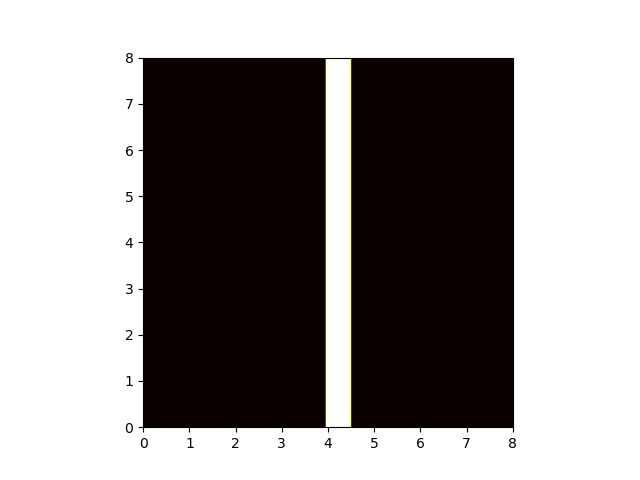

In [16]:
potentialAnimation = animateImages(
        length, 
        simulator.potentials, 
        10, 
        0, 
        potentialHeight, 
        colorMap = "hot"
    )

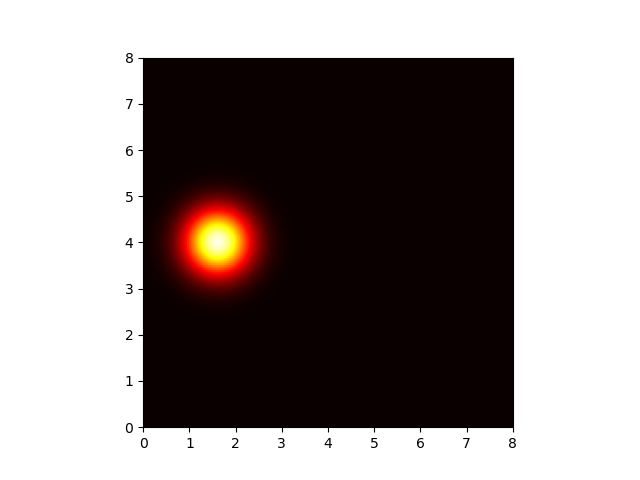

In [17]:
waveAnimation = animateImages(
        length, 
        simulator.probabilities, 
        10, 
        0, 
        math.max(simulator.probabilities), 
        [length / 2 - barrierWidth, barrierWidth, length / 2 + barrierWidth], 
        [0, 1, 0], 
        colorMap = "hot"
    )

In [10]:
waveAnimation.save(caseName + ".gif")

In [11]:
potentialAnimation.save(caseName + "Potential.gif")

In [12]:
unknownStepMatrix = simulator.createNextStepMatrix(simulator.potentials[-1])

In [13]:
unknownStepMatrix.todense()

matrix([[1.-0.5j  , 0.+0.125j, 0.+0.j   , ..., 0.+0.j   , 0.+0.j   ,
         0.+0.j   ],
        [0.+0.125j, 1.-0.5j  , 0.+0.125j, ..., 0.+0.j   , 0.+0.j   ,
         0.+0.j   ],
        [0.+0.j   , 0.+0.125j, 1.-0.5j  , ..., 0.+0.j   , 0.+0.j   ,
         0.+0.j   ],
        ...,
        [0.+0.j   , 0.+0.j   , 0.+0.j   , ..., 1.-0.5j  , 0.+0.125j,
         0.+0.j   ],
        [0.+0.j   , 0.+0.j   , 0.+0.j   , ..., 0.+0.125j, 1.-0.5j  ,
         0.+0.125j],
        [0.+0.j   , 0.+0.j   , 0.+0.j   , ..., 0.+0.j   , 0.+0.125j,
         1.-0.5j  ]])

In [14]:
knownStepMatrix = simulator.createCurrentStepMatrix(simulator.potentials[-1])

In [15]:
knownStepMatrix.todense()

matrix([[1.+0.5j  , 0.-0.125j, 0.+0.j   , ..., 0.+0.j   , 0.+0.j   ,
         0.+0.j   ],
        [0.-0.125j, 1.+0.5j  , 0.-0.125j, ..., 0.+0.j   , 0.+0.j   ,
         0.+0.j   ],
        [0.+0.j   , 0.-0.125j, 1.+0.5j  , ..., 0.+0.j   , 0.+0.j   ,
         0.+0.j   ],
        ...,
        [0.+0.j   , 0.+0.j   , 0.+0.j   , ..., 1.+0.5j  , 0.-0.125j,
         0.+0.j   ],
        [0.+0.j   , 0.+0.j   , 0.+0.j   , ..., 0.-0.125j, 1.+0.5j  ,
         0.-0.125j],
        [0.+0.j   , 0.+0.j   , 0.+0.j   , ..., 0.+0.j   , 0.-0.125j,
         1.+0.5j  ]])